In [3]:
import scipy.stats as stat
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [4]:
def pairwise(iterable):
    "s -> (s0, s1), (s1, s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)
def inner_product(x,y):
    return sum(a * b for (a,b) in zip(x,y))

## Draw histogram

Interval boundaries:       20.0 35.0 50.0 65.0 80.0 95.0

Corresponding frequencies: 80.0 170.0 165.0 70.0 15.0


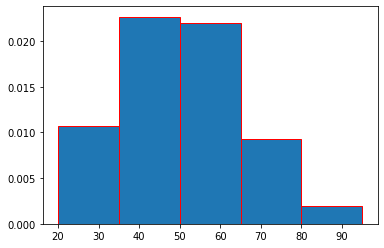

In [7]:
k = 5
x_first = 20
x_last = 95
z = [x_first + i * (x_last - x_first) / k for i in range(k + 1)]
z_mids = [(a + b) / 2 for (a,b) in pairwise(z)]
n = [80.0, 170.0, 165.0, 70.0, 15.0]
n_scaled = [x / sum(n) for x in n]
print("Interval boundaries:      ",*z)
print("\nCorresponding frequencies:", *n)

plt.bar(z_mids,[x / (z[1] - z[0]) for x in n_scaled], width = 15, edgecolor = 'red')
plt.show()    

## Compute estimation of expectation, variance, median and coef. of variance

In [8]:
mean = inner_product(z_mids, n_scaled)
variance = inner_product([(x - mean)**2 for x in z_mids], n_scaled)
median = 50.0 # exactly half (250) values are less than 50
coef_variance = variance**0.5 / mean
print(f"Sample expectation: {mean}")
print(f"Sample variance: {variance}")
print(f"Sample median: {median}")
print(f"Sample coefficient of variance: {coef_variance}")

Sample expectation: 50.6
Sample variance: 231.39
Sample median: 50.0
Sample coefficient of variance: 0.30062270357519094


## Estimation values after adding fluctuations

In [9]:
fluctuation = 5000

new_mean = mean + fluctuation / sum(n)
new_variance = inner_product([(x - new_mean)**2 for x in z_mids], n_scaled) + (fluctuation - new_mean)**2 / sum(n)
new_median = 50.0 # new median is located somewhere in (50,65) interval but still is approximately 50
new_coef_variance = new_variance**0.5 / new_mean
print(f"New sample expectation: {new_mean}")
print(f"New sample variance: {new_variance}")
print(f"New sample median: {new_median}")
print(f"New sample coefficient of variance: {new_coef_variance}")

New sample expectation: 60.6
New sample variance: 49126.73471999999
New sample median: 50.0
New sample coefficient of variance: 3.657516764079368
